# Classifying Codon Frequencies using a Neural Network Classifier

##### Shannon Stoehr CS 445 Final Project

The data set used for this project is courtesy of the Machine Learning Repository of UC Irvine.

During my work I found typos for the Salmonella enterica subsp. enterica serovar 4,12;I and the Non-A, non-B hepatitis virus entries. They have been updated manually using the codon information from https://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=353569 and https://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=12440. I have included a copy of the data I used with this assignment.

Source: Bohdan Khomtchouk, Ph.D. University of Chicago, Department of Medicine, Section of Computational Biomedicine and Biomedical Data Science. (https://archive.ics.uci.edu/ml/datasets/Codon+usage). Email: bohdan@uchicago.edu

## What are Codons?

The Central Dogma of genetics is that DNA is transcribed into RNA which is then translated into protein. The nucleotide "alphabet" consists of adenine (A), cytosine (C), guanine (G), and thymine (T, DNA only) or uracil (U, RNA only). A codon is a nucleotide triplet (ex. AUG) that is eventually translated into an amino acid (ex. AUG 🡲 Methionine) or a release factor (ex. UAA/UAG/UGA 🡲 stop codons, halting translation). There are 64 total codon possibilities (4^3) as shown below. It's important to know that some codons will code for the same amino acid (eg. GU_ all code for Valine). This phenomenon is known as redundancy: it's important because it can help minimize the negative effects that incorrectly placed nucleotides can have on protein synthesis (https://www.nature.com/scitable/topicpage/the-information-in-dna-determines-cellular-function-6523228/).

![A codon chart showing all 64 possibilities.](https://cdn.kastatic.org/ka-perseus-images/f5de6355003ee322782b26404ef0733a1d1a61b0.png)
Source: Khan Academy (https://www.khanacademy.org/science/ap-biology/gene-expression-and-regulation/translation/a/the-genetic-code-discovery-and-properties)

In [1]:
# importing the data
import pandas
data = pandas.read_csv('codon_usageCOPY.csv', low_memory=False)
data

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## Attribute Information

##### From https://archive.ics.uci.edu/ml/datasets/Codon+usage

### **Column 1: Kingdom**

The 'Kingdom' is a 3-letter code corresponding to 'xxx' in the CUTG database name: 'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries. Note that the CUTG database does not contain 'arc' and 'plm' (these have been manually curated ourselves).

* 'arc'(archaea)
* 'bct'(bacteria)
* 'phg'(bacteriophage)
* 'plm' (plasmid)
* 'pln' (plant)
* 'inv' (invertebrate)
* 'vrt' (vertebrate)
* 'mam' (mammal)
* 'rod' (rodent)
* 'pri' (primate)
* 'vrl' (virus)

**Column 2: DNAtype**

The 'DNAtype' is denoted as an integer for the genomic composition in the species: 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.

* 0 (genomic)
* 1 (mitochondrial)
* 2 (chloroplast)
* 3 (cyanelle)
* 4 (plastid)
* 5 (nucleomorph)
* 6 (secondary_endosymbiont)
* 7 (chromoplast)
* 8 (leucoplast)
* 9 (NA)
* 10 (proplastid)
* 11 (apicoplast)
* 12 (kinetoplast)

**Column 3: SpeciesID**

The species identifier ('SpeciesID') is an integer, which uniquely indicates the entries of an organism. It is an accession identifier for each different species in the original CUTG database, followed by the first item listed in each genome. *This will not be used for classification.*

**Column 4: Ncodons**

The number of codons ('Ncodons') is the algebraic sum of the numbers listed for the different codons in an entry of CUTG. Codon frequencies are normalized to the total codon count, hence the number of occurrences divided by 'Ncodons' is the codon frequencies listed in the data file. *This will not be used for classification.*

**Column 5: SpeciesName**

The species' name ('SpeciesName') is represented in strings purged of 'comma' (which are now replaced by 'space'). This is a descriptive label of the name of the species for data interpretations. *This will not be used for classification.*

**Columns 6-69: codon**

Lastly, the codon frequencies ('codon') including 'UUU', 'UUA', 'UUG', 'CUU', etc., are recorded as floats (with decimals in 5 digits).

There are a total of 13028 samples, each with 69 attributes. These will be the input values for the classifier.

In [2]:
# from A4: Classification of Hand-Drawn Digits
import matplotlib.pyplot as plt

In [3]:
%%writefile optimizers.py
import numpy as np

######################################################################
## class Optimizers()
######################################################################

class Optimizers():

    def __init__(self, all_weights):
        '''all_weights is a vector of all of a neural networks weights concatenated into a one-dimensional vector'''
        
        self.all_weights = all_weights

        # The following initializations are only used by adam.
        # Only initializing m, v, beta1t and beta2t here allows multiple calls to adam to handle training
        # with multiple subsets (batches) of training data.
        self.mt = np.zeros_like(all_weights)
        self.vt = np.zeros_like(all_weights)
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.beta1t = 1
        self.beta2t = 1

        
    def sgd(self, error_f, gradient_f, fargs=[], n_epochs=100, learning_rate=0.001, verbose=True, error_convert_f=None):
        
        # error_f: function that requires X and T as arguments (given in fargs) and returns mean squared error.
        # gradient_f: function that requires X and T as arguments (in fargs) and returns gradient of mean squared error with respect to each weight.
        # error_convert_f: function that converts the standardized error from error_f to original T units.

        error_trace = []
        epochs_per_print = n_epochs // 10

        for epoch in range(n_epochs):

            error = error_f(*fargs)
            grad = gradient_f(*fargs)

            # Update all weights using -= to modify their values in-place.
            self.all_weights -= learning_rate * grad

            if error_convert_f:
                error = error_convert_f(error)
            error_trace.append(error)

            if verbose and ((epoch + 1) % max(1, epochs_per_print) == 0):
                print(f'sgd: Epoch {epoch+1:d} Error={error:.5f}')

        return error_trace

    def adam(self, error_f, gradient_f, fargs=[], n_epochs=100, learning_rate=0.001, verbose=True, error_convert_f=None):
        # error_f: function that requires X and T as arguments (given in fargs) and returns mean squared error.
        # gradient_f: function that requires X and T as arguments (in fargs) and returns gradient of mean squared error with respect to each weight.
        # error_convert_f: function that converts the standardized error from error_f to original T units.

        alpha = learning_rate  # learning rate called alpha in original paper on adam
        epsilon = 1e-8
        error_trace = []
        epochs_per_print = n_epochs // 10

        for epoch in range(n_epochs):

            error = error_f(*fargs)
            grad = gradient_f(*fargs)

            self.mt[:] = self.beta1 * self.mt + (1 - self.beta1) * grad
            self.vt[:] = self.beta2 * self.vt + (1 - self.beta2) * grad * grad
            self.beta1t *= self.beta1
            self.beta2t *= self.beta2

            m_hat = self.mt / (1 - self.beta1t)
            v_hat = self.vt / (1 - self.beta2t)

            # Update all weights using -= to modify their values in-place.
            self.all_weights -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    
            if error_convert_f:
                error = error_convert_f(error)
            error_trace.append(error)

            if verbose and ((epoch + 1) % max(1, epochs_per_print) == 0):
                print(f'Adam: Epoch {epoch+1:d} Error={error:.5f}')

        return error_trace

if __name__ == '__main__':

    import matplotlib.pyplot as plt
    plt.ion()

    def parabola(wmin):
        return ((w - wmin) ** 2)[0]

    def parabola_gradient(wmin):
        return 2 * (w - wmin)

    w = np.array([0.0])
    optimizer = Optimizers(w)

    wmin = 5
    optimizer.sgd(parabola, parabola_gradient, [wmin],
                  n_epochs=500, learning_rate=0.1)

    print(f'sgd: Minimum of parabola is at {wmin}. Value found is {w}')

    w = np.array([0.0])
    optimizer = Optimizers(w)
    optimizer.adam(parabola, parabola_gradient, [wmin],
                   n_epochs=500, learning_rate=0.1)
    
    print(f'adam: Minimum of parabola is at {wmin}. Value found is {w}')

Overwriting optimizers.py


In [4]:
# from A4: Classification of Hand-Drawn Digits
import numpy as np
import optimizers
import sys  # for sys.float_info.epsilon

######################################################################
## class NeuralNetwork()
######################################################################

class NeuralNetwork():


    def __init__(self, n_inputs, n_hiddens_per_layer, n_outputs, activation_function='tanh'):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.activation_function = activation_function

        # Set self.n_hiddens_per_layer to [] if argument is 0, [], or [0]
        if n_hiddens_per_layer == 0 or n_hiddens_per_layer == [] or n_hiddens_per_layer == [0]:
            self.n_hiddens_per_layer = []
        else:
            self.n_hiddens_per_layer = n_hiddens_per_layer

        # Initialize weights, by first building list of all weight matrix shapes.
        n_in = n_inputs
        shapes = []
        for nh in self.n_hiddens_per_layer:
            shapes.append((n_in + 1, nh))
            n_in = nh
        shapes.append((n_in + 1, n_outputs))

        # self.all_weights:  vector of all weights
        # self.Ws: list of weight matrices by layer
        self.all_weights, self.Ws = self.make_weights_and_views(shapes)

        # Define arrays to hold gradient values.
        # One array for each W array with same shape.
        self.all_gradients, self.dE_dWs = self.make_weights_and_views(shapes)

        self.trained = False
        self.total_epochs = 0
        self.error_trace = []
        self.Xmeans = None
        self.Xstds = None
        self.Tmeans = None
        self.Tstds = None


    def make_weights_and_views(self, shapes):
        # vector of all weights built by horizontally stacking flatenned matrices
        # for each layer initialized with uniformly-distributed values.
        all_weights = np.hstack([np.random.uniform(size=shape).flat / np.sqrt(shape[0])
                                 for shape in shapes])
        # Build list of views by reshaping corresponding elements from vector of all weights
        # into correct shape for each layer.
        views = []
        start = 0
        for shape in shapes:
            size =shape[0] * shape[1]
            views.append(all_weights[start:start + size].reshape(shape))
            start += size
        return all_weights, views


    # Return string that shows how the constructor was called
    def __repr__(self):
        return f'{type(self).__name__}({self.n_inputs}, {self.n_hiddens_per_layer}, {self.n_outputs}, \'{self.activation_function}\')'


    # Return string that is more informative to the user about the state of this neural network.
    def __str__(self):
        result = self.__repr__()
        if len(self.error_trace) > 0:
            return self.__repr__() + f' trained for {len(self.error_trace)} epochs, final training error {self.error_trace[-1]:.4f}'


    def train(self, X, T, n_epochs, learning_rate, method='sgd', verbose=True):
        # train: 
            # X: n_samples x n_inputs matrix of input samples, one per row
            # T: n_samples x n_outputs matrix of target output values, one sample per row
            # n_epochs: number of passes to take through all samples updating weights each pass
            # learning_rate: factor controlling the step size of each update
            # method: is either 'sgd' or 'adam'

        # Setup standardization parameters
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xstds[self.Xstds == 0] = 1  # So we don't divide by zero when standardizing
            self.Tmeans = T.mean(axis=0)
            self.Tstds = T.std(axis=0)
            
        # Standardize X and T
        X = (X - self.Xmeans) / self.Xstds
        T = (T - self.Tmeans) / self.Tstds

        # Instantiate Optimizers object by giving it vector of all weights
        optimizer = optimizers.Optimizers(self.all_weights)

        # Define function to convert value from error_f into error in original T units, 
        # but only if the network has a single output. Multiplying by self.Tstds for 
        # multiple outputs does not correctly unstandardize the error.
        if len(self.Tstds) == 1:
            error_convert_f = lambda err: (np.sqrt(err) * self.Tstds)[0] # to scalar
        else:
            error_convert_f = lambda err: np.sqrt(err)[0] # to scalar
            

        if method == 'sgd':

            error_trace = optimizer.sgd(self.error_f, self.gradient_f,
                                        fargs=[X, T], n_epochs=n_epochs,
                                        learning_rate=learning_rate,
                                        verbose=True,
                                        error_convert_f=error_convert_f)

        elif method == 'adam':

            error_trace = optimizer.adam(self.error_f, self.gradient_f,
                                         fargs=[X, T], n_epochs=n_epochs,
                                         learning_rate=learning_rate,
                                         verbose=True,
                                         error_convert_f=error_convert_f)

        else:
            raise Exception("method must be 'sgd' or 'adam'")
        
        self.error_trace = error_trace

        # Return neural network object to allow applying other methods after training.
        #  Example:    Y = nnet.train(X, T, 100, 0.01).use(X)
        return self

    def relu(self, s):
        s[s < 0] = 0
        return s

    def grad_relu(self, s):
        return (s > 0).astype(int)
    
    def forward_pass(self, X):
        '''X assumed already standardized. Output returned as standardized.'''
        self.Ys = [X]
        for W in self.Ws[:-1]:
            if self.activation_function == 'relu':
                self.Ys.append(self.relu(self.Ys[-1] @ W[1:, :] + W[0:1, :]))
            else:
                self.Ys.append(np.tanh(self.Ys[-1] @ W[1:, :] + W[0:1, :]))
        last_W = self.Ws[-1]
        self.Ys.append(self.Ys[-1] @ last_W[1:, :] + last_W[0:1, :])
        return self.Ys

    # Function to be minimized by optimizer method, mean squared error
    def error_f(self, X, T):
        Ys = self.forward_pass(X)
        mean_sq_error = np.mean((T - Ys[-1]) ** 2)
        return mean_sq_error

    # Gradient of function to be minimized for use by optimizer method
    def gradient_f(self, X, T):
        '''Assumes forward_pass just called with layer outputs in self.Ys.'''
        error = T - self.Ys[-1]
        n_samples = X.shape[0]
        n_outputs = T.shape[1]
        delta = - error / (n_samples * n_outputs)
        n_layers = len(self.n_hiddens_per_layer) + 1
        # Step backwards through the layers to back-propagate the error (delta)
        for layeri in range(n_layers - 1, -1, -1):
            # gradient of all but bias weights
            self.dE_dWs[layeri][1:, :] = self.Ys[layeri].T @ delta
            # gradient of just the bias weights
            self.dE_dWs[layeri][0:1, :] = np.sum(delta, 0)
            # Back-propagate this layer's delta to previous layer
            if self.activation_function == 'relu':
                delta = delta @ self.Ws[layeri][1:, :].T * self.grad_relu(self.Ys[layeri])
            else:
                delta = delta @ self.Ws[layeri][1:, :].T * (1 - self.Ys[layeri] ** 2)
        return self.all_gradients

    def use(self, X):
        '''X assumed to not be standardized'''
        # Standardize X
        X = (X - self.Xmeans) / self.Xstds
        Ys = self.forward_pass(X)
        Y = Ys[-1]
        # Unstandardize output Y before returning it
        return Y * self.Tstds + self.Tmeans

Adam: Epoch 25 Error=0.25596
Adam: Epoch 50 Error=0.22840
Adam: Epoch 75 Error=0.20858
Adam: Epoch 100 Error=0.18258
Adam: Epoch 125 Error=0.14746
Adam: Epoch 150 Error=0.10728
Adam: Epoch 175 Error=0.07490
Adam: Epoch 200 Error=0.05585
Adam: Epoch 225 Error=0.04427
Adam: Epoch 250 Error=0.03650


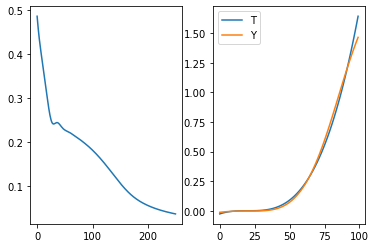

In [5]:
# from A4: Classification of Hand-Drawn Digits
X = np.arange(100).reshape((-1, 1))
T = (X - 20) ** 3 / 300000

hiddens = [10]
nnet = NeuralNetwork(X.shape[1], hiddens, T.shape[1])
nnet.train(X, T, 250, 0.01, method='adam')

plt.subplot(1, 2, 1)
plt.plot(nnet.error_trace)

plt.subplot(1, 2, 2)
plt.plot(T, label='T')
plt.plot(nnet.use(X), label='Y')
plt.legend()

In [6]:
# from my A4: Classification of Hand-Drawn Digits
class NeuralNetworkClassifier(NeuralNetwork):
    
    def makeIndicatorVars(self, T):
        # Make sure T is two-dimensional. Should be nSamples x 1.
        if T.ndim == 1:
            T = T.reshape((-1, 1))
        # print('makeIndicatorvars T: ', (T == np.unique(T)).astype(int).shape)
        return (T == np.unique(T)).astype(int)
    
    def softmax(self, X):
        fs = np.exp(X)
        denom = np.sum(fs, axis=1).reshape((-1,1))
        gs = fs / denom
        return gs
    
    def train(self, X, T, n_epochs, learning_rate, method='sgd', verbose=True):
        # Setup standardization parameters
        self.labels = np.unique(T)
        # print("self.labels: ", self.labels)
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xstds[self.Xstds == 0] = 1
            Tcon = np.zeros(T.shape)
            for i in range(len(T)):
                for j in range(len(self.labels)):
                    if T[i] == self.labels[j]:
                        Tcon[i] = j
            Tprint = np.hstack((Tcon, T))
            # print("Tprint (are things labeled correctly?): ", Tprint)
            self.Tmeans = Tcon.mean(axis=0)
            # print("Tcon.mean in train: ", Tcon.mean(axis=0))
            self.Tstds = Tcon.std(axis=0)
        
        # Standardize X
        X = (X - self.Xmeans) / self.Xstds
        TI = self.makeIndicatorVars(T)
        
        optimizer = optimizers.Optimizers(self.all_weights)
        to_likelihood = lambda nll: np.exp(-nll)
        if method == 'adam':
            likelihood_trace = optimizer.adam(self.error_f, self.gradient_f, fargs=[X,TI],
                                          n_epochs=n_epochs, learning_rate=learning_rate, verbose=verbose, error_convert_f=to_likelihood)
        elif method == 'sgd':
            likelihood_trace = optimizer.sgd(self.error_f, self.gradient_f, fargs=[X,TI],
                                          n_epochs=n_epochs, learning_rate=learning_rate, verbose=verbose, error_convert_f=to_likelihood)
        else:
            raise Exception("method must be 'sgd' or 'adam'")
        self.error_trace = likelihood_trace
        return self
        

    def error_f(self, X, T): # neg_log_likelihood
        Ys = self.forward_pass(X)
        Ysm = self.softmax(Ys[-1])
        return - np.mean(T * np.log(Ysm))

    def gradient_f(self, X, T): #gradient_neg_log_likelihood
        '''Assumes forward_pass just called with layer outputs in self.Ys.'''
        error = T - self.softmax(self.Ys[-1])
        n_samples = X.shape[0]
        n_outputs = T.shape[1]
        delta = - error / (n_samples * n_outputs)
        n_layers = len(self.n_hiddens_per_layer) + 1
        # Step backwards through the layers to back-propagate the error (delta)
        for layeri in range(n_layers - 1, -1, -1):
            # gradient of all but bias weights
            self.dE_dWs[layeri][1:, :] = self.Ys[layeri].T @ delta
            # gradient of just the bias weights
            self.dE_dWs[layeri][0:1, :] = np.sum(delta, 0)
            #  Back-propagate this layer's delta to previous layer
            if self.activation_function == 'relu':
                delta = delta @ self.Ws[layeri][1:, :].T * self.grad_relu(self.Ys[layeri])
            else:
                delta = delta @ self.Ws[layeri][1:, :].T * (1 - self.Ys[layeri] ** 2)
        return self.all_gradients
    
    def use(self, X):
        # Standardize X
        X = (X - self.Xmeans) / self.Xstds
        Ys = self.forward_pass(X)
        labeled_data = []
        probs = []
        data = Ys[-1]
        for i in range(len(data)):
            labeled_data.append(self.labels[np.argmax(np.exp(data[i])/np.sum(np.exp(data[i])))])
            probs.append(np.exp(data[i])/np.sum(np.exp(data[i])))
            # print("data[i]: ", data[i])
            # print("np.argmax(data[i]): ", np.argmax(data[i]))
            # print("i: ", i, "label: ", self.labels[np.argmax(data[i])])
            # print("probs: ", np.exp(data[i])/np.sum(np.exp(data[i])))
        ret_data = np.array(labeled_data).reshape((-1,1))
        ret_probs = np.array(probs)
        return ret_data, ret_probs

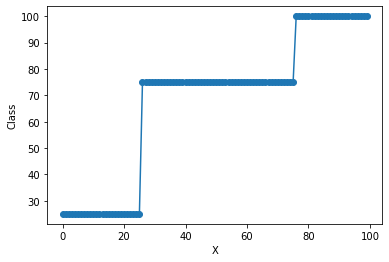

In [7]:
# from A4: Classification of Hand-Drawn Digits
X = np.arange(100).reshape((-1, 1))
T = X.copy()
T[T <= 25] = 25
T[np.logical_and(25 < T, T <= 75)] = 75
T[T > 75] = 100

plt.plot(X, T, 'o-')
plt.xlabel('X')
plt.ylabel('Class');

Adam: Epoch 20 Error=0.79836
Adam: Epoch 40 Error=0.87032
Adam: Epoch 60 Error=0.91574
Adam: Epoch 80 Error=0.93984
Adam: Epoch 100 Error=0.95264
Adam: Epoch 120 Error=0.96034
Adam: Epoch 140 Error=0.96553
Adam: Epoch 160 Error=0.96931
Adam: Epoch 180 Error=0.97222
Adam: Epoch 200 Error=0.97454


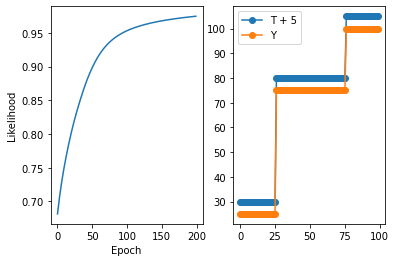

In [8]:
# from A4: Classification of Hand-Drawn Digits

hiddens = [10]
nnet = NeuralNetworkClassifier(X.shape[1], hiddens, len(np.unique(T)))
nnet.train(X, T, 200, 0.01, method='adam', verbose=True)

plt.subplot(1, 2, 1)
plt.plot(nnet.error_trace)
plt.xlabel('Epoch')
plt.ylabel('Likelihood')

plt.subplot(1, 2, 2)
plt.plot(T + 5, 'o-', label='T + 5')  # to see, when predicted overlap T very closely
plt.plot(nnet.use(X)[0], 'o-', label='Y')
plt.legend()

Ok, everything is working as planned. Just checking.

In [9]:
data_arr = data.to_numpy()
print(data_arr.shape)

(13028, 69)


In [10]:
# extract what we need
# ignoring SpeciesID, Ncodons, and SpeciesName
T_kingdoms = np.reshape(data_arr[:, 0], ((-1,1))) # kingdoms
T_DNAtype = np.reshape(data_arr[:, 1], ((-1,1))) # DNAtype
X_codons = data_arr[:, 5:69].astype('float32') # codon frequencies...needed to be converted for code to work
print(T_kingdoms[0], T_kingdoms.shape)
print(T_DNAtype[0], T_DNAtype.shape)
print(len(X_codons[0]), X_codons.shape)
print(X_codons[0])

['vrl'] (13028, 1)
[0] (13028, 1)
64 (13028, 64)
[0.01654 0.01203 0.0005  0.00351 0.01203 0.03208 0.001   0.0401  0.00551
 0.02005 0.00752 0.02506 0.01103 0.0411  0.00902 0.03308 0.01003 0.05013
 0.01554 0.01103 0.02356 0.03208 0.01203 0.00501 0.01003 0.01203 0.03158
 0.01905 0.02456 0.01353 0.02155 0.00251 0.00652 0.0015  0.01554 0.00501
 0.02105 0.00902 0.01053 0.00501 0.02256 0.00301 0.03108 0.00401 0.02607
 0.00251 0.01153 0.00501 0.02356 0.01053 0.0386  0.00401 0.00702 0.00401
 0.00451 0.01303 0.03559 0.01003 0.04612 0.01203 0.04361 0.00251 0.0005
 0.     ]


In [11]:
# from my A2: Multilayer Neural Networks for Nonlinear Regression
def partition(X, T, n_folds, random_shuffle=True):
    np.random.seed(42)
    rows = np.arange(X.shape[0])
    np.random.shuffle(rows)
    X = X[rows, :]
    T = T[rows, :]
    n_samples = X.shape[0]
    n_per_fold = n_samples // n_folds
    n_last_fold = n_samples - n_per_fold * (n_folds - 1)
    folds = []
    start = 0
    for foldi in range(n_folds - 1):
        folds.append( (X[start:start + n_per_fold, :], T[start:start + n_per_fold, :]) )
        start += n_per_fold
    folds.append( (X[start:, :], T[start:, :]) )
    Xvalidate, Tvalidate = folds[0]
    Xtest, Ttest = folds[1]
    Xtrain, Ttrain = np.vstack([X for (X, _) in folds[2:]]), np.vstack([T for (_, T) in folds[2:]])
    return Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest

In [12]:
# split the data up into train, validate, and test
n_folds = 5
Xtrain_kingdom, Ttrain_kingdom, Xval_kingdom, Tval_kingdom, Xtest_kingdom, Ttest_kingdom = partition(X_codons, T_kingdoms, n_folds, random_shuffle=True)
Xtrain_DNAtype, Ttrain_DNAtype, Xval_DNAtype, Tval_DNAtype, Xtest_DNAtype, Ttest_DNAtype = partition(X_codons, T_DNAtype, n_folds, random_shuffle=True)

In [13]:
# based off of my A4: Classification of Hand-Drawn Digits
import time

def run_experiments(hl_structures, classes, epochs, learning_rates, act_func, opt, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest):
    table = []
    prog_total = len(hl_structures) * len(epochs) * len(learning_rates) * len(act_func) * len(opt)
    prog_curr = 1
    for h in range(len(hl_structures)):
        for e in range(len(epochs)):
            for lr in range(len(learning_rates)):
                for a in range(len(act_func)):
                    for o in range(len(opt)):
                        start = time.time()
                        print("Progress: ", prog_curr, "/", prog_total)
                        nnet = NeuralNetworkClassifier(Xtrain.shape[1], hl_structures[h], len(classes), act_func[a])
                        nnet.train(Xtrain, Ttrain, epochs[e], learning_rates[lr], method=opt[o], verbose=False)
                        end = time.time()
                        total_time = str(end - start)
                        Xtrain_res, Xtrain_prob = nnet.use(Xtrain)
                        Xval_res, Xval_prob = nnet.use(Xval)
                        Xtest_res, Xtest_prob = nnet.use(Xtest)
                        train_acc = 100 * np.mean(Xtrain_res == Ttrain)
                        val_acc = 100 * np.mean(Xval_res == Tval)
                        test_acc = 100 * np.mean(Xtest_res == Ttest)
                        table.append([hl_structures[h],
                                      epochs[e],
                                      learning_rates[lr],
                                      act_func[a],
                                      opt[o],
                                      train_acc,
                                      val_acc,
                                      test_acc,
                                      total_time])
                        prog_curr += 1
    column_labels = ['Hidden Layers',
                     'Epochs',
                     'Learning Rate',
                     'Activation Function',
                     'Optimization',
                     'Train',
                     'Validate',
                     'Test',
                     'Training Time']
    results = pandas.DataFrame(table, columns=column_labels)
    best_arch = results.loc[results['Validate'] == results['Validate'].max()]
    # we are considering the architecture with the best validate accuracy to be the best overall
    return results, best_arch

In [14]:
# experiment parameters
hl_structures = [[],
                 [10],
                 [10,10],
                 [50],
                 [50,50],
                 [100],
                 [100,50,10]]
epochs = [50, 500]
learning_rates = [0.01, 0.001, 0.0005]
activation_functions = ['tanh', 'relu']
optimizations = ['sgd', 'adam']

In [15]:
exp_res_kingdom, exp_best_kingdom_arch = run_experiments(hl_structures,
                                                         np.unique(T_kingdoms),
                                                         epochs,
                                                         learning_rates,
                                                         activation_functions,
                                                         optimizations,
                                                         Xtrain_kingdom,
                                                         Ttrain_kingdom,
                                                         Xval_kingdom,
                                                         Tval_kingdom,
                                                         Xtest_kingdom,
                                                         Ttest_kingdom)

print("Best architecture for kingdoms: ", exp_best_kingdom_arch)
exp_res_kingdom

Progress:  1 / 168
Progress:  2 / 168
Progress:  3 / 168
Progress:  4 / 168
Progress:  5 / 168
Progress:  6 / 168
Progress:  7 / 168
Progress:  8 / 168
Progress:  9 / 168
Progress:  10 / 168
Progress:  11 / 168
Progress:  12 / 168
Progress:  13 / 168
Progress:  14 / 168
Progress:  15 / 168
Progress:  16 / 168
Progress:  17 / 168
Progress:  18 / 168
Progress:  19 / 168
Progress:  20 / 168
Progress:  21 / 168
Progress:  22 / 168
Progress:  23 / 168
Progress:  24 / 168
Progress:  25 / 168
Progress:  26 / 168
Progress:  27 / 168
Progress:  28 / 168
Progress:  29 / 168
Progress:  30 / 168
Progress:  31 / 168
Progress:  32 / 168
Progress:  33 / 168
Progress:  34 / 168
Progress:  35 / 168
Progress:  36 / 168
Progress:  37 / 168
Progress:  38 / 168
Progress:  39 / 168
Progress:  40 / 168
Progress:  41 / 168
Progress:  42 / 168
Progress:  43 / 168
Progress:  44 / 168
Progress:  45 / 168
Progress:  46 / 168
Progress:  47 / 168
Progress:  48 / 168
Progress:  49 / 168
Progress:  50 / 168
Progress:

,Hidden Layers,Epochs,Learning Rate,Activation Function,Optimization,Train,Validate,Test,Training Time
0,[],50,0.0100,tanh,sgd,20.069071,18.387716,19.692898,1.1215004920959473
1,[],50,0.0100,tanh,adam,81.235610,79.654511,80.575816,1.1149990558624268
2,[],50,0.0100,relu,sgd,13.891021,14.088292,13.742802,1.3595001697540283
3,[],50,0.0100,relu,adam,80.596060,78.963532,80.383877,1.1985011100769043
4,[],50,0.0010,tanh,sgd,5.743157,5.374280,6.065259,1.2365021705627441
...,...,...,...,...,...,...,...,...,...
163,"[100, 50, 10]",500,0.0010,relu,adam,94.141724,89.174664,89.328215,32.48100018501282
164,"[100, 50, 10]",500,0.0005,tanh,sgd,12.471220,11.938580,13.320537,39.09650015830994
165,"[100, 50, 10]",500,0.0005,tanh,adam,81.862369,78.925144,80.230326,36.28349947929382
166,"[100, 50, 10]",500,0.0005,relu,sgd,22.384241,22.495202,22.418426,26.431999444961548


In [16]:
exp_res_DNAtype, exp_best_DNAtype_arch = run_experiments(hl_structures,
                                                         np.unique(Ttrain_DNAtype),
                                                         epochs,
                                                         learning_rates,
                                                         activation_functions,
                                                         optimizations,
                                                         Xtrain_DNAtype,
                                                         Ttrain_DNAtype,
                                                         Xval_DNAtype,
                                                         Tval_DNAtype,
                                                         Xtest_DNAtype,
                                                         Ttest_DNAtype)

print("Best architecture for DNAtype: ", exp_best_DNAtype_arch)
exp_res_DNAtype

Progress:  1 / 168
Progress:  2 / 168
Progress:  3 / 168
Progress:  4 / 168
Progress:  5 / 168
Progress:  6 / 168
Progress:  7 / 168
Progress:  8 / 168
Progress:  9 / 168
Progress:  10 / 168
Progress:  11 / 168
Progress:  12 / 168
Progress:  13 / 168
Progress:  14 / 168
Progress:  15 / 168
Progress:  16 / 168
Progress:  17 / 168
Progress:  18 / 168
Progress:  19 / 168
Progress:  20 / 168
Progress:  21 / 168
Progress:  22 / 168
Progress:  23 / 168
Progress:  24 / 168
Progress:  25 / 168
Progress:  26 / 168
Progress:  27 / 168
Progress:  28 / 168
Progress:  29 / 168
Progress:  30 / 168
Progress:  31 / 168
Progress:  32 / 168
Progress:  33 / 168
Progress:  34 / 168
Progress:  35 / 168
Progress:  36 / 168
Progress:  37 / 168
Progress:  38 / 168
Progress:  39 / 168
Progress:  40 / 168
Progress:  41 / 168
Progress:  42 / 168
Progress:  43 / 168
Progress:  44 / 168
Progress:  45 / 168
Progress:  46 / 168
Progress:  47 / 168
Progress:  48 / 168
Progress:  49 / 168
Progress:  50 / 168
Progress:

,Hidden Layers,Epochs,Learning Rate,Activation Function,Optimization,Train,Validate,Test,Training Time
0,[],50,0.0100,tanh,sgd,29.534408,28.752399,29.289827,0.7450013160705566
1,[],50,0.0100,tanh,adam,96.891788,96.506718,96.506718,0.7640013694763184
2,[],50,0.0100,relu,sgd,43.566129,43.838772,45.028791,0.7054991722106934
3,[],50,0.0100,relu,adam,96.904579,96.775432,96.737044,0.7140004634857178
4,[],50,0.0010,tanh,sgd,17.306216,16.161228,18.310940,0.714998722076416
...,...,...,...,...,...,...,...,...,...
163,"[100, 50, 10]",500,0.0010,relu,adam,99.398823,99.001919,99.040307,29.942498683929443
164,"[100, 50, 10]",500,0.0005,tanh,sgd,0.025582,0.000000,0.076775,37.37349891662598
165,"[100, 50, 10]",500,0.0005,tanh,adam,99.488360,99.193858,99.078695,41.00350046157837
166,"[100, 50, 10]",500,0.0005,relu,sgd,68.841136,70.134357,69.174664,24.498499155044556


The best architecture for kingdom classification was:

|  |Hidden Layers | Epochs | Learning Rate | Activation Function | Optimization | Train | Validate | Test | Time |
|---|---|---|---|---|---|---|---|---|---|
| 135 | [100] | 500 | 0.01 | relu | adam | 100.00000 | 92.207294 | 93.358925 | 24.87s |

The best architecture for DNAtype classification was:

|  |Hidden Layers | Epochs | Learning Rate | Activation Function | Optimization | Train | Validate | Test | Time |
|---|---|---|---|---|---|---|---|---|---|
| 135 | [100] | 500 | 0.01 | relu | adam | 99.961627 | 99.309021 | 99.078695 | 21.20s |

The same architecture for both!

In [17]:
# from A4: Classification of Hand-Drawn Digits
def confusion_matrix(classes, test):
    table = []
    labels = np.unique(classes)
    classes_con = np.zeros(classes.shape)
    for i in range(len(classes)):
        for j in range(len(labels)):
                if classes[i] == labels[j]:
                    classes_con[i] = j
    test_con = np.zeros(test.shape)
    for i in range(len(test)):
        for j in range(len(labels)):
                if test[i] == labels[j]:
                    test_con[i] = j
    #print("classes_con: ", classes_con)
    for true_class in range(len(labels)):
        row = []
        for predicted_class in range(len(labels)):
            row.append(100 * np.mean(classes_con[test_con == true_class] == predicted_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=labels, columns=labels)
    return conf_matrix

In [18]:
# using the best architecture, how accurately can we predict kingdoms?
kingdom_best = NeuralNetworkClassifier(Xtrain_kingdom.shape[1], [100], len(np.unique(T_kingdoms)), activation_function='relu')
kingdom_best.train(Xtrain_kingdom, Ttrain_kingdom, 500, 0.01, method='adam', verbose=False)
kingdom_best_classes, kingdom_best_probs = kingdom_best.use(Xtest_kingdom)
kingdom_best_cm = confusion_matrix(kingdom_best_classes, Ttest_kingdom)
kingdom_best_cm

,arc,bct,inv,mam,phg,plm,pln,pri,rod,vrl,vrt
arc,88.235294,11.764706,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
bct,0.684932,94.691781,0.513699,0.000000,1.883562,0.0,2.054795,0.000000,0.000000,0.000000,0.171233
inv,0.000000,1.831502,87.179487,0.366300,0.000000,0.0,6.959707,0.000000,0.732601,2.564103,0.366300
mam,0.000000,0.000000,0.000000,89.285714,0.000000,0.0,0.892857,2.678571,1.785714,1.785714,3.571429
phg,2.380952,11.904762,0.000000,0.000000,80.952381,0.0,2.380952,0.000000,0.000000,2.380952,0.000000
plm,0.000000,33.333333,0.000000,0.000000,16.666667,50.0,0.000000,0.000000,0.000000,0.000000,0.000000
pln,0.000000,1.002004,2.204409,0.000000,0.400802,0.0,93.386774,0.000000,0.000000,2.605210,0.400802
pri,0.000000,0.000000,0.000000,5.128205,0.000000,0.0,0.000000,79.487179,2.564103,7.692308,5.128205
rod,0.000000,0.000000,0.000000,16.666667,0.000000,0.0,0.000000,2.777778,77.777778,0.000000,2.777778
vrl,0.000000,0.359066,1.795332,0.000000,0.000000,0.0,1.436266,0.000000,0.179533,95.870736,0.359066


The most misclassified kingdom was 'plm' (plasmid, 50.0). It was mislabeled as 'bct' (bacteria) 33.33% of the time and 'phg' (bacteriophage) 16.67% of the time. According to the National Human Genome Research Institute, a plasmid is "a small circular DNA molecule found in bacteria and some other microscopic organisms" (https://www.genome.gov/genetics-glossary/Plasmid). Mislabeling a plasmid as a bacteria or bacteriophage ("a virus that infects bacteria", https://www.khanacademy.org/science/biology/biology-of-viruses/virus-biology/a/bacteriophages) makes sense as they are all related to bacteria, with plasmids and bacteriophages being slightly more specific.

Other misclassifications are also understandable as the kingdoms are related. For instance, rodents were classified correctly 77.78% of the time, but 16.67% of the time were 'misclassified' as mammals. The same could be said about primates: primates are mammals, and they are also vertebrates. In my opinion, this is a case of poor labeling by the source data, as rodents are technically mammals and vertebrates. I am interested to read more about the reasoning behind the labeling choices of the author.

The most accurately classified kingdom was 'vrt' (vertebrates, 95.91). It is interesting to see that primates are misclassified as viral DNA 7.68% of the time. According to the Science up to 8% of DNA is of ancient viral origin (https://www.science.org/content/article/viral-fossils-our-dna-may-help-us-fight-infection), so this misclassification at that rate is to be expected. The 'vrl' (viral) kingdom was close behind with an accuracy of 95.87. It is encouraging that this classifier was able to identify viral DNA so well as this was one of the main goals of this experiment. With diseases mutating as quickly as they do it is important to be able to quickly identify potentially harmful DNA and quickly find similar relatives in order to appropriately develop effective treatments.

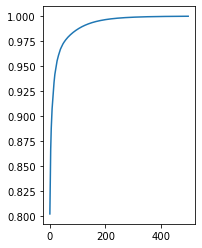

In [19]:
# likelihood trace for kingdoms
plt.subplot(1, 2, 1)
plt.plot(kingdom_best.error_trace)

In [20]:
# using the best architecture, how accurately can we predict DNAtype?
DNAtype_best = NeuralNetworkClassifier(Xtrain_DNAtype.shape[1], [100], len(np.unique(Ttrain_DNAtype)), activation_function='relu')
DNAtype_best.train(Xtrain_DNAtype, Ttrain_DNAtype, 500, 0.01, method='adam', verbose=False)
DNAtype_best_classes, DNAtype_best_probs = DNAtype_best.use(Xtest_DNAtype)
DNAtype_best_cm = confusion_matrix(DNAtype_best_classes, Ttest_DNAtype)
DNAtype_best_cm

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,0,1,2,3,4,11
0,99.729584,0.162250,0.108167,0.000000,0.000000,0.0
1,0.171233,99.657534,0.171233,0.000000,0.000000,0.0
2,2.439024,0.000000,96.341463,0.609756,0.609756,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,28.571429,0.000000,42.857143,0.000000,28.571429,0.0
11,0.000000,0.000000,0.000000,0.000000,0.000000,100.0


In [21]:
# Wait, where are the other values? What's with the error? Double checking the data, there are...
print(data['DNAtype'].value_counts())

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64


In [22]:
print(np.unique(Ttrain_DNAtype))
print(np.unique(Ttest_DNAtype))

[0 1 2 3 4 6 7 9 11 12]
[0 1 2 4 5 9 11 12]


Turns out there are no DNA samples in the data that are DNAtype '8' (leucoplast) or '10' (proplastid). There also weren't any DNAtype '3' samples in the test data. More questions for the authors of the data.

The most misclassified DNAtype was '4' (plastid, 28.57). It was misclassified as '2' (chloroplast) at 42.85% and '0' (genomic) at 28.57%. A plastid is a plant cell organelle (mini cell machinery "organ"), and chloroplasts (the sites for photosynthesis) are plastids (https://www.nature.com/scitable/topicpage/the-origin-of-plastids-14125758/). Again, more questions about the labeling scheme for the authors.

DNAtype '11' (apicoplast) was classified perfectly (100.0%). An apicoplast is an organelle that lives in parasites, such as the one that causes malaria (https://www.nature.com/scitable/topicpage/the-apicoplast-an-organelle-with-a-green-14231555/).

The next most accurately classified DNAtypes were '0' (genomic, 99.73) and '1' (mitochondrial, 99.66). Genomic and mitochondrial samples were the two most common sample types. Genomic means a sample that include the entire species' genome (not limited to certain organs etc.), and mitochondria are the organelles that generate most of the chemical energy for the cell (the true powerhouse of the cell, https://www.genome.gov/genetics-glossary/Mitochondria), and is necessary in all living beings.

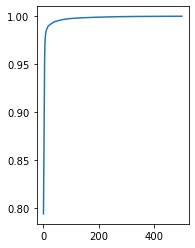

In [23]:
# likelihood trace for DNAtype
plt.subplot(1, 2, 1)
plt.plot(DNAtype_best.error_trace)

Are there any correlations between codons and kingdom or codons and DNAtype?

In [25]:
print(np.unique(data['Kingdom']))

['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']


In [28]:
# let's make everything numbers for some easy correlations that Pandas will do for me
data['Kingdom'] = data['Kingdom'].replace(['arc', 'bct', 'inv', 'mam', 'phg', 'plm', 'pln', 'pri', 'rod', 'vrl', 'vrt'],
                                          [0,1,2,3,4,5,6,7,8,9,10])
data

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,9,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,9,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,9,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,9,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,7,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,7,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,7,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,7,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [31]:
data_corr = data.corr()
data_corr

,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Kingdom,1.000000,0.169479,0.058942,-0.075663,0.007493,0.167831,-0.029749,-0.070904,0.297460,0.228316,...,-0.265591,0.064279,0.185943,-0.234331,-0.238411,-0.263376,-0.194454,0.052493,0.019269,0.261049
DNAtype,0.169479,1.000000,-0.020671,-0.053869,0.456915,0.192253,0.460169,-0.039323,0.379370,0.067454,...,-0.218555,-0.085856,-0.324560,-0.273859,-0.459336,-0.100732,-0.497574,0.127702,-0.029417,0.458569
SpeciesID,0.058942,-0.020671,1.000000,0.051598,0.020018,-0.016733,0.025688,-0.047719,0.055717,0.022057,...,0.011089,-0.026525,-0.000409,-0.005584,-0.028789,-0.014054,-0.079133,0.047511,-0.012816,0.050160
Ncodons,-0.075663,-0.053869,0.051598,1.000000,-0.035154,-0.028123,-0.033710,0.009492,-0.040635,-0.001745,...,0.068370,-0.010998,0.001501,0.024785,0.034607,0.028564,0.053023,-0.026612,0.003677,-0.047958
UUU,0.007493,0.456915,0.020018,-0.035154,1.000000,-0.354083,0.761390,0.337760,0.312967,-0.433250,...,-0.343606,0.303605,-0.104975,0.163682,-0.598977,0.154091,-0.452491,0.161922,0.008285,0.154572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.263376,-0.100732,-0.014054,0.028564,0.154091,-0.464520,0.188351,0.315404,-0.028047,-0.532899,...,-0.228033,0.476702,0.046328,0.684480,-0.218420,1.000000,-0.085162,0.077879,-0.019792,-0.402001
GAG,-0.194454,-0.497574,-0.079133,0.053023,-0.452491,-0.079002,-0.577687,0.115323,-0.430695,0.013356,...,0.524379,0.057005,0.477482,0.120200,0.673022,-0.085162,1.000000,-0.289657,0.004036,-0.582578
UAA,0.052493,0.127702,0.047511,-0.026612,0.161922,-0.014834,0.263113,-0.131225,0.168436,0.014527,...,-0.251605,0.020103,-0.157387,-0.067417,-0.292131,0.077879,-0.289657,1.000000,0.136473,0.276998
UAG,0.019269,-0.029417,-0.012816,0.003677,0.008285,-0.046411,0.009585,0.053591,0.010321,-0.009272,...,-0.001661,0.050214,0.085773,-0.010157,-0.053811,-0.019792,0.004036,0.136473,1.000000,0.007049


In [43]:
# that's a lot to look at...we just want codons -> kingdom and codons -> DNAtype
codon_labels = data.columns[5:].to_numpy().reshape((-1,1))
codon_labels

array([['UUU'],
       ['UUC'],
       ['UUA'],
       ['UUG'],
       ['CUU'],
       ['CUC'],
       ['CUA'],
       ['CUG'],
       ['AUU'],
       ['AUC'],
       ['AUA'],
       ['AUG'],
       ['GUU'],
       ['GUC'],
       ['GUA'],
       ['GUG'],
       ['GCU'],
       ['GCC'],
       ['GCA'],
       ['GCG'],
       ['CCU'],
       ['CCC'],
       ['CCA'],
       ['CCG'],
       ['UGG'],
       ['GGU'],
       ['GGC'],
       ['GGA'],
       ['GGG'],
       ['UCU'],
       ['UCC'],
       ['UCA'],
       ['UCG'],
       ['AGU'],
       ['AGC'],
       ['ACU'],
       ['ACC'],
       ['ACA'],
       ['ACG'],
       ['UAU'],
       ['UAC'],
       ['CAA'],
       ['CAG'],
       ['AAU'],
       ['AAC'],
       ['UGU'],
       ['UGC'],
       ['CAU'],
       ['CAC'],
       ['AAA'],
       ['AAG'],
       ['CGU'],
       ['CGC'],
       ['CGA'],
       ['CGG'],
       ['AGA'],
       ['AGG'],
       ['GAU'],
       ['GAC'],
       ['GAA'],
       ['GAG'],
       ['UAA'],
       [

In [44]:
# pair codon labels with correlations
data_corr_arr = data_corr.to_numpy()
kingdom_pred = data_corr_arr[4:,0].reshape((-1,1)) # correlations of codons -> kingdom only
kingdom_pred_labeled = np.hstack((codon_labels, kingdom_pred))
kingdom_pred_labeled

array([['UUU', 0.0074931456132936594],
       ['UUC', 0.16783141678300564],
       ['UUA', -0.029749275587980815],
       ['UUG', -0.07090373018036514],
       ['CUU', 0.29746018466104157],
       ['CUC', 0.22831552451801176],
       ['CUA', 0.35482234736113355],
       ['CUG', -0.22721768568268833],
       ['AUU', 0.004358962827683957],
       ['AUC', 0.0615276986094823],
       ['AUA', 0.17960941184701845],
       ['AUG', -0.10614724220713524],
       ['GUU', -0.07370733326788549],
       ['GUC', -0.178478522256799],
       ['GUA', 0.04872700945992732],
       ['GUG', -0.1802572259210716],
       ['GCU', 0.003447417008824879],
       ['GCC', -0.06686636772130382],
       ['GCA', 0.1425912356584615],
       ['GCG', -0.41927299963068965],
       ['CCU', 0.25446539147395275],
       ['CCC', 0.28389982130390196],
       ['CCA', 0.4097450236236333],
       ['CCG', -0.3791905941740217],
       ['UGG', -0.11034246818218699],
       ['GGU', -0.25969134138750916],
       ['GGC', -0.3068446675

In [46]:
# sort by correlation to see extremes
kingdom_pred_labeled_sorted = kingdom_pred_labeled[np.argsort(kingdom_pred_labeled[:,1])]
kingdom_pred_labeled_sorted

array([['GCG', -0.41927299963068965],
       ['CCG', -0.3791905941740217],
       ['CGC', -0.3668026485888255],
       ['GGC', -0.3068446675613557],
       ['ACG', -0.28886399573750987],
       ['CGU', -0.28289082488372325],
       ['UCG', -0.2790017824898473],
       ['CGG', -0.2655907655816539],
       ['GAA', -0.263376197962943],
       ['GGU', -0.25969134138750916],
       ['GAC', -0.238411226901013],
       ['GAU', -0.23433082853887455],
       ['CUG', -0.22721768568268833],
       ['GAG', -0.194453515686013],
       ['GUG', -0.1802572259210716],
       ['GUC', -0.178478522256799],
       ['CAG', -0.15654431517176992],
       ['AAG', -0.1289198159913954],
       ['UGG', -0.11034246818218699],
       ['AUG', -0.10614724220713524],
       ['AAA', -0.09777452848277733],
       ['GUU', -0.07370733326788549],
       ['UUG', -0.07090373018036514],
       ['UAU', -0.06906833122716731],
       ['GCC', -0.06686636772130382],
       ['AAU', -0.06135000774768277],
       ['AGC', -0.045082737

According to the Boston University School of Public Health, the correlation coefficient is a measure of the closeness of association of data points: positive values show a positive correlation, negative values show a negative correlation, and values closer to zero show that a correlation is weak (or zero) (https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html). We will focus on values that are less than -0.3 or greater than 0.3 for this evaluation.

#### Kingdoms:

GCG (alanine, -0.419), CCG (proline, -0.379), CGC (arginine, -0.367), and GGC (glycine, -0.307) have stronger negative correlation coefficients.

CCA (proline, 0.409), ACA (threonine, 0.379), CUA (leucine, 0.355), UCA (serine, 0.312), and UCC (serine, 0.308) have stronger positive correlation coefficients.

It is interesting to see that different codons that code for proline (CCG and CCA) have opposite correlations (negative and positive, respectively). This suggests that certain kingdoms will favor one proline codon over the other. The other proline codons (CCU, 0.254 and CCC, 0.284) also have positive correlation coefficients.

It is also interesting to see that two serine codons (UCA, UCC) have similar positive correlation coefficients. The other serine codons have negative coefficient correlations (UCG, -0.279), (AGU, -0.037), and (AGC, -0.045), except for (UCU, 0.133).

Other codons of interest are AUG (methionine/START, -0.106), UAA (STOP, 0.0525), UAG (STOP, 0.0192), and UGA (STOP, 0.261). It makes sense that these don't have strong correlations to determining a species' kingdom. Every being needs these codons, so they will be abundant regardless of kingdom.

In [47]:
DNAtype_pred = data_corr_arr[4:,1].reshape((-1,1))
DNAtype_pred_labeled = np.hstack((codon_labels, DNAtype_pred)) # correlations of codons -> DNAtype only
DNAtype_pred_labeled

array([['UUU', 0.4569145674162792],
       ['UUC', 0.19225272744747104],
       ['UUA', 0.46016901592528225],
       ['UUG', -0.03932270248887432],
       ['CUU', 0.3793703409224325],
       ['CUC', 0.06745361074864516],
       ['CUA', 0.45911356148792726],
       ['CUG', -0.31450643652714627],
       ['AUU', 0.4594599581002439],
       ['AUC', 0.13985445705014313],
       ['AUA', 0.4505831709370647],
       ['AUG', -0.37083993710486896],
       ['GUU', -0.07587754595485852],
       ['GUC', -0.32661469984833613],
       ['GUA', 0.38878538164471177],
       ['GUG', -0.444590055654474],
       ['GCU', -0.054742428076469604],
       ['GCC', -0.12038931343212259],
       ['GCA', 0.03843082410819814],
       ['GCG', -0.32189341043005903],
       ['CCU', 0.03996064206926092],
       ['CCC', 0.030958074771004686],
       ['CCA', 0.1623294871823376],
       ['CCG', -0.3271469022437793],
       ['UGG', -0.2539214445059419],
       ['GGU', -0.15021268399718551],
       ['GGC', -0.287347370427897

In [48]:
# sort by correlation to see extremes
DNAtype_pred_labeled_sorted = DNAtype_pred_labeled[np.argsort(DNAtype_pred_labeled[:,1])]
DNAtype_pred_labeled_sorted

array([['GAG', -0.4975740566206373],
       ['CAG', -0.4971461519775949],
       ['AAG', -0.4947523334190914],
       ['GAC', -0.4593359383425588],
       ['GUG', -0.444590055654474],
       ['ACG', -0.3860045380686385],
       ['AGC', -0.3785542360702759],
       ['AUG', -0.37083993710486896],
       ['CCG', -0.3271469022437793],
       ['GUC', -0.32661469984833613],
       ['AGG', -0.32455998583680873],
       ['GCG', -0.32189341043005903],
       ['CUG', -0.31450643652714627],
       ['UGC', -0.31015640697744806],
       ['CGC', -0.29414656294897384],
       ['GGC', -0.28734737042789743],
       ['GAU', -0.27385919052907853],
       ['UCG', -0.2676448452215862],
       ['UGG', -0.2539214445059419],
       ['CGG', -0.21855511039370717],
       ['UAC', -0.19187371880608467],
       ['AAC', -0.18468420729921897],
       ['GGU', -0.15021268399718551],
       ['GCC', -0.12038931343212259],
       ['GGG', -0.11874357504266429],
       ['GAA', -0.10073184528288262],
       ['UGU', -0.09206

#### DNAtype:

GAG (glutamic acid, -0.498), CAG (glutamine, -0.497), AAG (lysine, -0.495), GAC (aspartic acid, -0.459), GUG (valine, -0.445), ACG (threonine, -0.386), AGC (serine, -0.379), AUG (methionine/START, -0.371), CCG (proline, -0.327), GUC (valine, -0.327), AGG (arginine, -0.325), GCG (alanine, -0.322), CUG (leucine, -0.315), UGC (cysteine, -0.310).

CGA (arginine, 0.487), UUA (leucine, 0.460), AUU (isoleucine, 0.459), CUA (leucine, 0.459), UGA (STOP, 0.459), UUU (phenylalanine, 0.457), AUA (isoleucine, 0.451), GUA (valine, 0.389), CUU (leucine, 0.379), UCA (serine, 0.369), UCU (serine, 0.318), UAU (tyrosine, 0.309).

It is interesting to see that different codons that code for valine (GUG, GUC and GUA) have opposite correlations (negative and positive, respectively). This suggests that certain DNAtypes will favor GUA valine codons over the other two. The other valine codon (GUU, -0.076) is almost negligible.

It is also interesting to see that serine is important again here in DNAtype. AGC, AGU, and UCG had negative correlation coefficients (-0.379, -0.055, and -0.268 respectively). UCA, UCU, and UCC had positive correlation coefficients (0.369, 0.318, and 0.118 respectively).

Other codons of interest are UAA (STOP, 0.128) and UAG (STOP, -0.029). It is likely that these are both common stop codons in all DNAtypes.

## Conclusions:

Genomic sequencing studies continue to be intense processes that involve a lot of time and power. By utilizing machine learning, organizations can quickly make predictions about new DNA sequences. Identifying previously unknown viral families can help in keeping humanity more suited to treat illness and better prepared for potential pandemics in the future (https://www.pennmedicine.org/news/news-releases/2019/may/how-do-you-find-a-virus-thats-completely-unknown-study-says-look-to-the-genome). The neural network classifier architecture deemed best from these experiments (determined by highest accuracy on validation data) was:

|  |Hidden Layers | Epochs | Learning Rate | Activation Function | Optimization | Train | Validate | Test | Time |
|---|---|---|---|---|---|---|---|---|---|
| kingdom | [100] | 500 | 0.01 | relu | adam | 100.00000 | 92.207294 | 93.358925 | 24.87s |
| DNAtype | [100] | 500 | 0.01 | relu | adam | 99.961627 | 99.309021 | 99.078695 | 21.20s |

The networks with this architecture achieved 93.36% test data accuracy on predicting kingdoms from codon frequencies and 99.08% test data accuracy on predicting DNAtype from codon frequencies. Further research would be worthwhile by focusing on nucleotide frequencies to determine why certain kingdoms or DNAtypes are more likely to use one codon over another that codes for the same amino acid.

Thank you for a wonderful semester! I really enjoyed working on this project!